### Data Science Salary Analysis

Dataset ini digunakan untuk menganalisis gaji di bidang data science. Data diambil dari sumber berikut:

[Data Science Salary Analysis - Kaggle](https://www.kaggle.com/code/adilashrafi/data-science-salary-analysis/input)

File dataset: `salaries.csv`


In [1]:
import pandas as pd

path = "salaries.csv"
df = pd.read_csv(path)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EN,FT,Azure Data Engineer,100000,USD,100000,MU,0,MU,S
1,2020,EN,CT,Staff Data Analyst,60000,CAD,44753,CA,50,CA,L
2,2020,SE,FT,Staff Data Scientist,164000,USD,164000,US,50,US,M
3,2020,EN,FT,Data Analyst,42000,EUR,47899,DE,0,DE,L
4,2020,EX,FT,Data Scientist,300000,USD,300000,US,100,US,L


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37234 entries, 0 to 37233
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           37234 non-null  int64 
 1   experience_level    37234 non-null  object
 2   employment_type     37234 non-null  object
 3   job_title           37234 non-null  object
 4   salary              37234 non-null  int64 
 5   salary_currency     37234 non-null  object
 6   salary_in_usd       37234 non-null  int64 
 7   employee_residence  37234 non-null  object
 8   remote_ratio        37234 non-null  int64 
 9   company_location    37234 non-null  object
 10  company_size        37234 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.1+ MB


In [3]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,37234.000000,3.723400e+04,37234.000000,37234.000000
mean,2023.656443,1.667366e+05,160540.603105,23.197884
std,0.611469,2.338090e+05,72679.876280,42.005217
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.100000e+05,110000.000000,0.000000
50%,2024.000000,1.500000e+05,150000.000000,0.000000
75%,2024.000000,2.000000e+05,200000.000000,0.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


### Data Cleaning

In [4]:
# Calculating the sum of empty data for each collumn

df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(18186)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EN,FT,Azure Data Engineer,100000,USD,100000,MU,0,MU,S
1,2020,EN,CT,Staff Data Analyst,60000,CAD,44753,CA,50,CA,L
2,2020,SE,FT,Staff Data Scientist,164000,USD,164000,US,50,US,M
3,2020,EN,FT,Data Analyst,42000,EUR,47899,DE,0,DE,L
4,2020,EX,FT,Data Scientist,300000,USD,300000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
37227,2024,MI,FT,Data Specialist,79200,USD,79200,US,0,US,M
37230,2024,SE,FT,Data Scientist,195500,USD,195500,US,100,US,M
37231,2024,SE,FT,Data Scientist,141300,USD,141300,US,100,US,M
37232,2024,SE,FT,Data Engineer,139810,USD,139810,US,0,US,M


In [8]:
# Experience Level
experience_level_dict={'EN':'Entry-level / Junior',
                       'MI':'Mid-level / Intermediate',
                       'SE':'Senior-level / Expert',
                       'EX':'Executive-level / Director'
                      }
df['experience_level']=df['experience_level'].map(experience_level_dict)

# Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}
df['employment_type'] = df['employment_type'].map(employment_type_dict)

### Data Exploration

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Analisis Univariabel

**Analisis Univariabel**

**Analisis univariabel** adalah langkah awal dalam memahami dataset dengan mempelajari distribusi dan pola dari satu variabel saja, baik itu variabel kategorikal maupun numerik.

---

**1. Jenis Variabel**
- **Kategorikal**: Berisi kategori atau kelompok diskrit (misalnya, jenis kelamin, warna, status pekerjaan).
- **Numerik**: Berisi angka yang bisa kontinu atau diskrit (misalnya, usia, pendapatan, suhu).

---

**2. Contoh Analisis**

**a. Variabel Kategorikal**  
Gunakan `sns.countplot` untuk menghitung frekuensi setiap kategori.  
```python
sns.countplot(data=df, x="Category_Variable")
```

- **Apa yang dianalisis?**  
  Melihat jumlah data untuk setiap kategori.
- **Hasilnya:**  
  Grafik batang yang menunjukkan distribusi setiap kategori, membantu mengetahui apakah ada ketidakseimbangan data.

---

**b. Variabel Numerik**  
Gunakan `sns.histplot` untuk mempelajari distribusi nilai numerik.  
```python
sns.histplot(data=df, x="Numeric_Variable", bins=10, kde=True)
```

- **Apa yang dianalisis?**  
  Melihat pola distribusi data, apakah normal, skewed, atau terdapat outlier.
- **Hasilnya:**  
  Histogram yang menunjukkan jumlah data dalam rentang nilai tertentu (dengan atau tanpa kurva distribusi).

([0, 1, 2, 3],
 [Text(0, 0, 'Entry-level / Junior'),
  Text(1, 0, 'Senior-level / Expert'),
  Text(2, 0, 'Executive-level / Director'),
  Text(3, 0, 'Mid-level / Intermediate')])

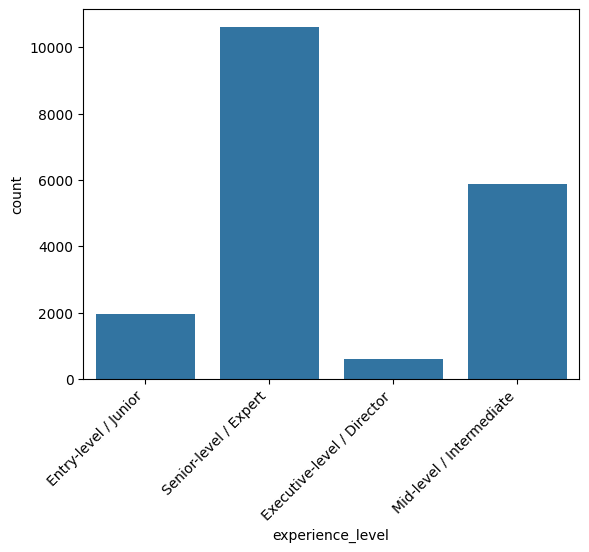

In [43]:
sns.countplot(df, x="experience_level")
# Adjust layout for better appearance
plt.xticks(rotation=45, ha="right", fontsize=10)

<Axes: xlabel='employment_type', ylabel='count'>

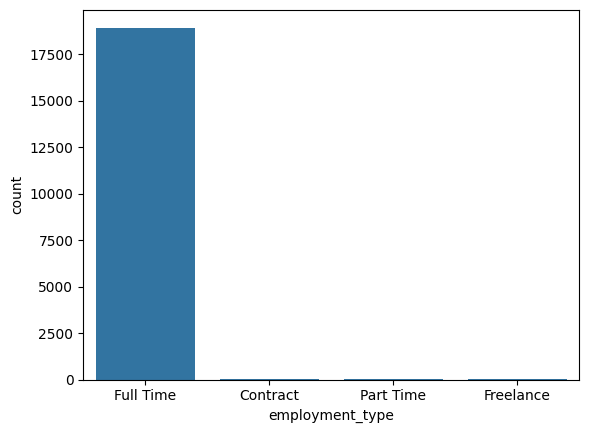

In [11]:
sns.countplot(df, x="employment_type")

<Axes: xlabel='salary_in_usd', ylabel='Count'>

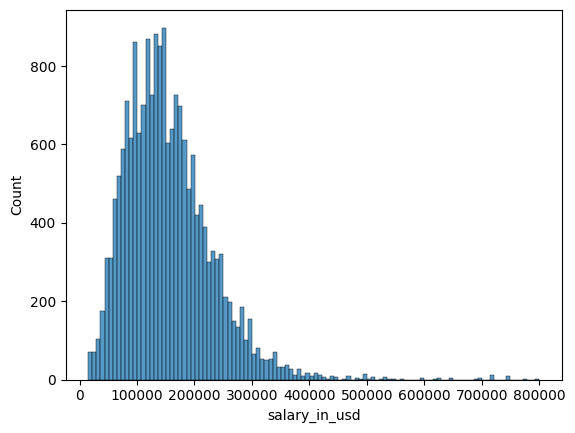

In [12]:
sns.histplot(data=df, x="salary_in_usd")

<Axes: xlabel='remote_ratio', ylabel='count'>

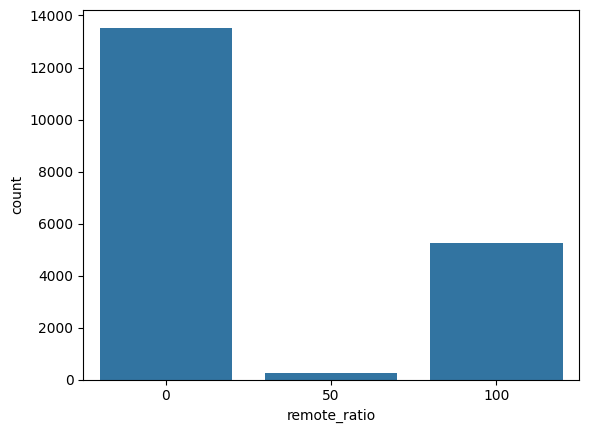

In [13]:
sns.countplot(df, x="remote_ratio")

#### Analisa Bivariabel

**Analisis Bivariabel**

**Numerik vs. Numerik**  
Gunakan `sns.scatterplot` untuk memvisualisasikan hubungan antara dua variabel numerik.  
```python
sns.scatterplot(data=df, x="Variable1", y="Variable2")
```
- **Fungsi:** Menunjukkan pola hubungan (positif, negatif, atau tidak ada hubungan) antara dua variabel.
- **Hasil:** Titik-titik data yang merepresentasikan pasangan nilai dari kedua variabel.

---

**Kategorikal vs. Numerik**  
Gunakan `sns.boxplot` untuk membandingkan distribusi variabel numerik di setiap kategori.  
```python
sns.boxplot(data=df, x="Categorical_Variable", y="Numeric_Variable")
```
- **Fungsi:** Menampilkan distribusi data, median, rentang interkuartil, dan outlier untuk setiap kategori.
- **Hasil:** Kotak-kotak yang merepresentasikan distribusi nilai numerik di setiap kategori.

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

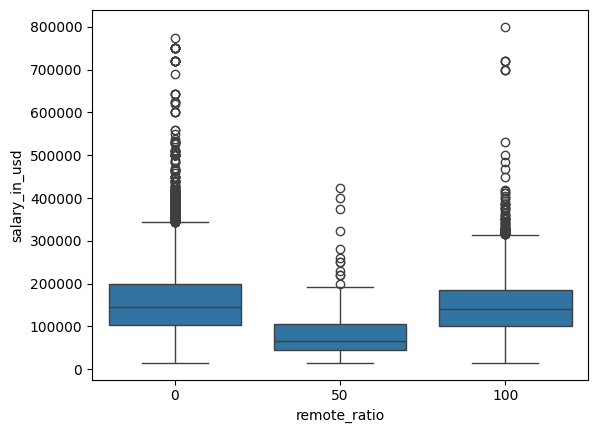

In [14]:
# Menggunakan barplot untuk merangkum nilai rata-rata salary berdasarkan remote_ratio
sns.boxplot(data=df, x="remote_ratio", y="salary_in_usd")

<Axes: xlabel='salary_in_usd', ylabel='Count'>

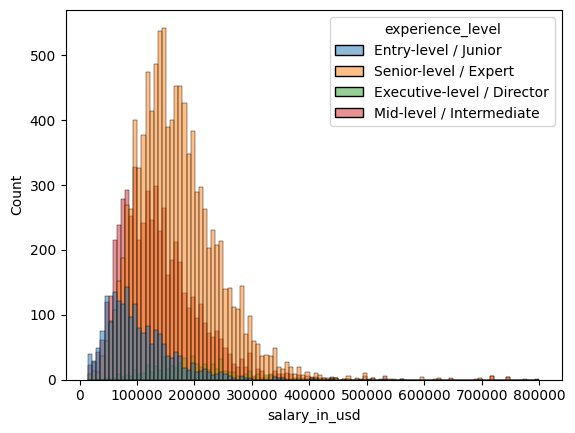

In [15]:
sns.histplot(data=df, x="salary_in_usd", hue="experience_level")

#### Analisis Multivariabel

**Rumus Korelasi Pearson**

Korelasi Pearson mengukur hubungan linear antara dua variabel. Rumusnya adalah:

\[
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
\]

- \( x_i, y_i \): Nilai individu dari dua variabel.
- \( \bar{x}, \bar{y} \): Rata-rata dari masing-masing variabel.
- \( r \): Nilai korelasi (antara -1 hingga 1).

```python
sns.heatmap(df.corr(), annot=True)
```

1. **`sns.heatmap(...)`**  
   - Membuat heatmap (peta panas) menggunakan library `seaborn` untuk memvisualisasikan data dalam bentuk tabel dengan warna.

2. **`df.corr()`**  
   - Menghitung matriks korelasi untuk semua pasangan kolom dalam DataFrame `df`. Setiap nilai menunjukkan kekuatan dan arah hubungan antara dua variabel:
     - \( r > 0 \): Hubungan positif.
     - \( r < 0 \): Hubungan negatif.
     - \( r = 0 \): Tidak ada hubungan.


<Axes: >

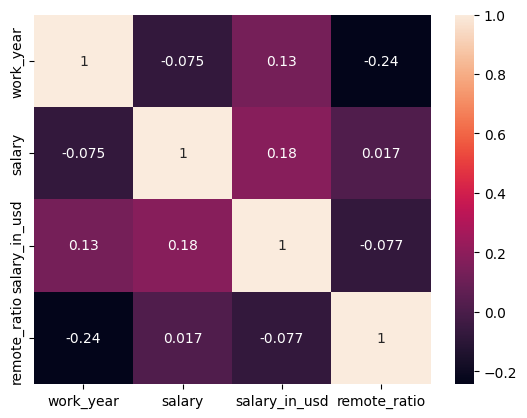

In [16]:
number_df = df.select_dtypes("number")
sns.heatmap(number_df.corr(), annot=True)

### Mendapatkan Insights dari Data

#### Top 10 Pekerjaan di Data Science

Penjelasan Kode

Kode ini menghasilkan diagram batang untuk memvisualisasikan 10 jabatan pekerjaan paling umum di bidang data science berdasarkan dataset yang diberikan.

Langkah-langkah Utama:
1. **Persiapan Data**:
   - `df_chart` mengambil 10 jabatan pekerjaan teratas beserta jumlahnya menggunakan `value_counts()` dari dataset.
   - `job_titles` menyimpan label jabatan pekerjaan (index dari `df_chart`).
   - `total_people` menyimpan jumlah yang sesuai (nilai dari `df_chart`).

2. **Skema Warna**:
   - Daftar warna yang telah ditentukan digunakan untuk memberikan gaya pada batang diagram.

3. **Pembuatan Diagram**:
   - `matplotlib.pyplot` digunakan untuk membuat diagram batang (`ax.bar`) dengan warna batang yang disesuaikan, garis tepi hitam, dan efek transparan sebagian (`alpha=0.7`).

4. **Pemberian Label pada Batang**:
   - Setiap batang diberi label dengan jumlahnya masing-masing (ditempatkan di tengah batang) menggunakan `ax.text`.

5. **Judul dan Sumbu**:
   - Diagram diberi judul deskriptif dan label sumbu untuk kejelasan.

6. **Peningkatan Tampilan**:
   - Label sumbu-x diputar agar lebih mudah dibaca.
   - `plt.tight_layout()` digunakan untuk menyesuaikan tata letak agar tidak terjadi tumpang tindih.

7. **Visualisasi**:
   - Diagram ditampilkan menggunakan `plt.show()`.

Hasil:
- Diagram batang yang menarik secara visual, menampilkan 10 jabatan pekerjaan teratas beserta jumlahnya dengan jelas sehingga data mudah untuk diinterpretasikan.


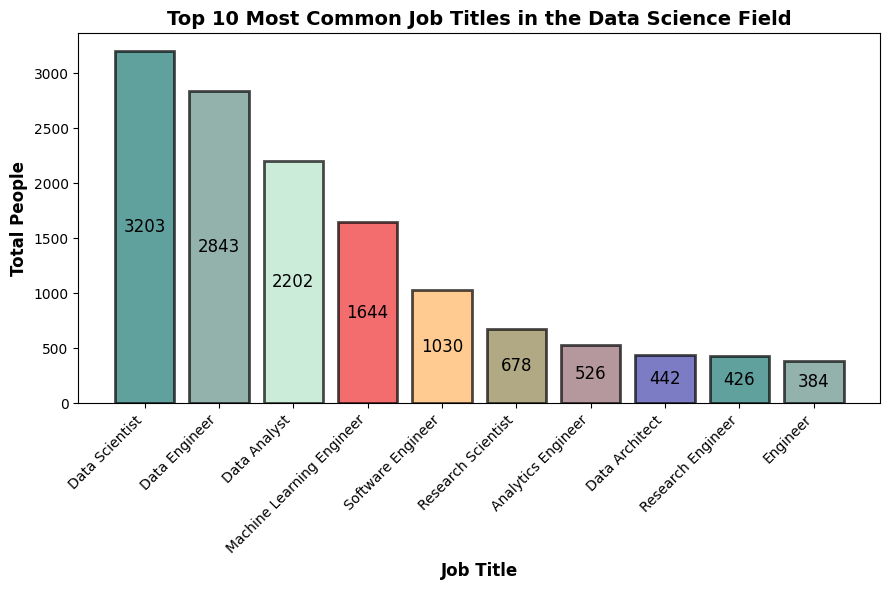

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 
df_chart = df['job_title'].value_counts()[:10]
# Sample data (replace df_chart.index and df_chart.values with actual data)
job_titles = df_chart.index  # Replace with actual job title labels
total_people = df_chart.values  # Replace with actual values

# Colors (reuse the given list or modify as needed)
colors = [
    "#1d7874",
    "#679289",
    "#B7E5CB",
    "#ee2e31",
    "#ffb563",
    "#918450",
    "#966C75",
    "#4344AA",
]

# Create the bar chart
fig, ax = plt.subplots(figsize=(9, 6))
bars = ax.bar(job_titles, total_people, color=colors[:len(job_titles)], edgecolor="black", linewidth=2, alpha=0.7)

# Add labels inside the bars
for bar, value in zip(bars, total_people):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f"{int(value)}",
        ha="center",
        va="center",
        fontsize=12,
        color="black"
    )

# Set titles and labels
ax.set_title("Top 10 Most Common Job Titles in the Data Science Field", fontsize=14, weight="bold")
ax.set_xlabel("Job Title", fontsize=12, weight="bold")
ax.set_ylabel("Total People", fontsize=12, weight="bold")

# Adjust layout for better appearance
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()


# Menghitung Rata-Rata Gaji Berdasarkan Job Title

Kode ini melakukan analisis untuk menghitung rata-rata gaji berdasarkan posisi pekerjaan (`job_title`):

1. **Mengelompokkan data** berdasarkan kolom `job_title` dan menghitung rata-rata gaji (`salary_in_usd`) menggunakan fungsi `groupby()` dan `mean()`.
2. **Menyusun ulang hasilnya** menjadi DataFrame baru dan mereset indeksnya menggunakan `reset_index()`.
3. **Mengubah nama kolom** untuk kejelasan (opsional), yaitu menjadi `job_title` dan `average_salary_in_usd`.
4. **Mengurutkan hasil** berdasarkan kolom `average_salary_in_usd` dan menampilkan 10 job title dengan rata-rata gaji tertinggi menggunakan `sort_values()` dan `tail(10)`.

Hasilnya adalah daftar 10 posisi pekerjaan dengan rata-rata gaji tertinggi.


In [18]:
# average salary based on payment

df_chart = df[["salary_in_usd", "job_title"]]
df_chart

,salary_in_usd,job_title
0,100000,Azure Data Engineer
1,44753,Staff Data Analyst
2,164000,Staff Data Scientist
3,47899,Data Analyst
4,300000,Data Scientist
...,...,...
37227,79200,Data Specialist
37230,195500,Data Scientist
37231,141300,Data Scientist
37232,139810,Data Engineer


In [19]:
# Calculate the average salary based on job_title
average_salary = df.groupby('job_title')['salary_in_usd'].mean().reset_index()
# Rename the columns for clarity (optional)
average_salary.columns = ['job_title', 'average_salary_in_usd']


average_salary.sort_values(by='average_salary_in_usd').tail(10)

,job_title,average_salary_in_usd
50,Cloud Data Architect,250000.000000
159,Machine Learning Model Engineer,255000.000000
141,Head of AI,257250.000000
152,ML Infrastructure Engineer,257265.000000
14,AWS Data Architect,258000.000000
134,Engineering Manager,273809.322581
144,Head of Machine Learning,288701.000000
18,Applied AI ML Lead,292500.000000
110,Data Science Tech Lead,375000.000000
17,Analytics Engineering Manager,399880.000000


C:\Users\Evint\AppData\Local\Temp\ipykernel_52628\3200868850.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


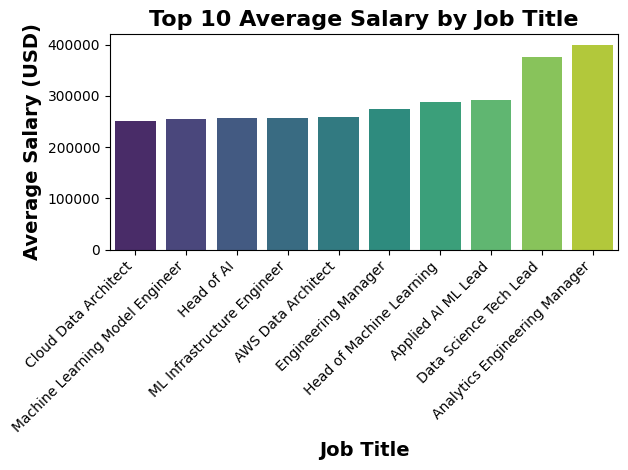

In [20]:
sns.barplot(
    data=average_salary.sort_values(by='average_salary_in_usd').tail(10),
    x='job_title',
    y='average_salary_in_usd',
    palette='viridis',  # You can customize the color palette
)

# Add title and labels
plt.title('Top 10 Average Salary by Job Title', fontsize=16, weight='bold')
plt.xlabel('Job Title', fontsize=14, weight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, weight='bold')

plt.xticks(rotation=45, ha="right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### AI Model Building

#### Feature Engineering

**Feature Engineering**

Feature engineering adalah proses memilih, membuat, atau memodifikasi fitur/variabel dalam dataset untuk meningkatkan kinerja model machine learning. Proses ini penting karena fitur yang relevan dan informatif dapat membantu model memahami pola dalam data lebih baik.

**Langkah-langkah Utama:**
1. **Pemilihan Variabel (Feature Selection)**:
   - Memilih fitur yang paling relevan dengan target menggunakan teknik seperti korelasi, mutual information, atau metode berbasis model (e.g., feature importance dari model pohon keputusan).

2. **Transformasi Data**:
   - Mengubah fitur agar lebih representatif, misalnya melalui normalisasi, standarisasi, atau encoding untuk data kategori.

3. **Pembuatan Fitur Baru**:
   - Menggabungkan fitur yang ada untuk menghasilkan fitur baru yang lebih informatif, seperti membuat fitur interaksi, agregasi, atau fitur temporal.

4. **Reduksi Dimensi**:
   - Mengurangi jumlah fitur menggunakan teknik seperti PCA (Principal Component Analysis) untuk menghindari overfitting atau redundansi.

**Tujuan:**
- Memastikan model hanya bekerja dengan fitur yang relevan dan bebas dari noise, sehingga performa dan efisiensi model meningkat.


In [21]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Entry-level / Junior,Full Time,Azure Data Engineer,100000,USD,100000,MU,0,MU,S
1,2020,Entry-level / Junior,Contract,Staff Data Analyst,60000,CAD,44753,CA,50,CA,L
2,2020,Senior-level / Expert,Full Time,Staff Data Scientist,164000,USD,164000,US,50,US,M
3,2020,Entry-level / Junior,Full Time,Data Analyst,42000,EUR,47899,DE,0,DE,L
4,2020,Executive-level / Director,Full Time,Data Scientist,300000,USD,300000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
37227,2024,Mid-level / Intermediate,Full Time,Data Specialist,79200,USD,79200,US,0,US,M
37230,2024,Senior-level / Expert,Full Time,Data Scientist,195500,USD,195500,US,100,US,M
37231,2024,Senior-level / Expert,Full Time,Data Scientist,141300,USD,141300,US,100,US,M
37232,2024,Senior-level / Expert,Full Time,Data Engineer,139810,USD,139810,US,0,US,M


In [22]:
df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              215
salary                4480
salary_currency         24
salary_in_usd         4924
employee_residence      91
remote_ratio             3
company_location        81
company_size             3
dtype: int64

In [23]:
X = df.drop(["salary_currency", "salary", "work_year", "employee_residence", "salary_in_usd"], axis=1)
y = df["salary_in_usd"].values

#### Label Encoding

**Penjelasan Singkat tentang Label Encoder**

Label Encoder adalah teknik dalam preprocessing data yang digunakan untuk mengubah data kategori menjadi representasi numerik. Setiap kategori unik dalam data diberikan nilai integer. Teknik ini sering digunakan ketika model machine learning hanya dapat bekerja dengan data numerik.

**Cara Kerja:**
1. Setiap kategori unik diurutkan dan diberi label integer mulai dari 0.
2. Data kategori asli diubah menjadi nilai numerik berdasarkan label yang telah ditetapkan.

**Contoh:**
- Data kategori: `['Merah', 'Hijau', 'Biru']`
- Hasil encoding: `{'Merah': 0, 'Hijau': 1, 'Biru': 2}`

**Kelebihan:**
- Mudah digunakan dan sederhana untuk data kategori yang terurut atau ordinal.

**Kekurangan:**
- Tidak mempertahankan hubungan non-hierarkis antar kategori (misalnya, model dapat menganggap 2 lebih besar dari 1).

**Penggunaan:**
Label Encoder cocok untuk data kategori dengan hubungan ordinal, tetapi untuk data kategori nominal, teknik seperti One-Hot Encoding lebih disarankan.


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
X

,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,Entry-level / Junior,Full Time,Azure Data Engineer,0,MU,S
1,Entry-level / Junior,Contract,Staff Data Analyst,50,CA,L
2,Senior-level / Expert,Full Time,Staff Data Scientist,50,US,M
3,Entry-level / Junior,Full Time,Data Analyst,0,DE,L
4,Executive-level / Director,Full Time,Data Scientist,100,US,L
...,...,...,...,...,...,...
37227,Mid-level / Intermediate,Full Time,Data Specialist,0,US,M
37230,Senior-level / Expert,Full Time,Data Scientist,100,US,M
37231,Senior-level / Expert,Full Time,Data Scientist,100,US,M
37232,Senior-level / Expert,Full Time,Data Engineer,0,US,M


In [26]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and you want to encode a specific column, e.g., 'job_title'
# Check the column and make sure to pass a single column for encoding
label_encoder = LabelEncoder()

encoded_df = pd.DataFrame()
for column in X.columns:
    encoded_df[column + '_encoded'] = label_encoder.fit_transform(X[column])

encoded_df

,experience_level_encoded,employment_type_encoded,job_title_encoded,remote_ratio_encoded,company_location_encoded,company_size_encoded
0,0,2,27,0,52,2
1,0,0,209,1,12,0
2,3,2,210,1,77,1
3,0,2,61,0,19,0
4,1,2,111,2,77,0
...,...,...,...,...,...,...
19043,2,2,113,0,77,1
19044,3,2,111,2,77,1
19045,3,2,111,2,77,1
19046,3,2,74,0,77,1


In [27]:
X = encoded_df.values

In [28]:
y.reshape((1,-1))

array([[100000,  44753, 164000, ..., 141300, 139810,  95325]])

#### Standard Scaling

**Penjelasan Singkat tentang Data Rescaling**

Data rescaling adalah proses transformasi data numerik ke dalam skala tertentu, biasanya untuk memastikan bahwa semua fitur memiliki rentang nilai yang serupa. Teknik ini penting dalam machine learning karena banyak algoritma sensitif terhadap perbedaan skala antar fitur, seperti regresi linier, SVM, dan algoritma berbasis gradien.

**Tujuan:**
- Menghindari dominasi fitur dengan rentang nilai besar terhadap fitur dengan nilai kecil.
- Mempercepat konvergensi model dalam proses pelatihan.

**Teknik Utama:**
1. **Min-Max Scaling**:
   - Mengubah data ke dalam rentang [0, 1] atau skala lain yang ditentukan.
   - Formula: 
     \[
     X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
     \]

2. **Standardization (Z-Score Scaling)**:
   - Mengubah data agar memiliki mean 0 dan standar deviasi 1.
   - Formula:
     \[
     X_{\text{standardized}} = \frac{X - \mu}{\sigma}
     \]
     di mana \(\mu\) adalah rata-rata dan \(\sigma\) adalah standar deviasi.

**Kapan Diperlukan:**
- Jika fitur memiliki unit yang berbeda atau rentang nilai yang jauh berbeda.
- Untuk algoritma berbasis jarak (e.g., KNN) atau gradien (e.g., Logistic Regression, Neural Networks).

**Catatan Penting:**
- Rescaling harus dilakukan setelah memisahkan data pelatihan dan pengujian untuk menghindari data leakage.


In [29]:
from sklearn.preprocessing import StandardScaler

scaler_model = StandardScaler()
scaled_y = scaler_model.fit_transform(y.reshape(-1, 1))
scaled_y

array([[-0.72227961],
       [-1.44637206],
       [ 0.11653368],
       ...,
       [-0.18098291],
       [-0.20051153],
       [-0.78355229]])

In [30]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, scaled_y, test_size=0.2, random_state=42
)

# Print shapes of train and test sets
print("Train shapes (X_train, y_train):", X_train.shape, y_train.shape)
print("Test shapes (X_test, y_test):", X_test.shape, y_test.shape)

Train shapes (X_train, y_train): (15238, 6) (15238, 1)
Test shapes (X_test, y_test): (3810, 6) (3810, 1)


#### Linear Regression

Linear regression adalah algoritma sederhana yang digunakan untuk **memprediksi hubungan antara dua variabel**: 

1. **Variabel independen** (X) – faktor yang digunakan untuk membuat prediksi.
2. **Variabel dependen** (Y) – hasil yang ingin diprediksi.

Tujuannya adalah **menemukan garis lurus** terbaik yang memetakan hubungan antara X dan Y. Garis ini disebut **garis regresi** dan dinyatakan dengan rumus:

\[
Y = mX + b
\]

- **m** adalah kemiringan garis (seberapa besar perubahan Y jika X berubah).
- **b** adalah titik potong garis di sumbu Y.

Dengan algoritma ini, kita bisa memprediksi nilai Y untuk nilai X tertentu berdasarkan pola data sebelumnya. Linear regression sering digunakan dalam analisis data dan prediksi yang sederhana.

In [31]:
from sklearn.linear_model import LinearRegression
# Initialize and train the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.8384661639014115
R^2 Score: 0.16314116862838468


### Use Gradient Boosting Regressor

Gradient Boosting Regressor adalah algoritma machine learning yang digunakan untuk **memprediksi nilai kontinu** (regresi) dengan cara menggabungkan banyak **model sederhana** (biasanya pohon keputusan) untuk membuat model yang kuat.

**Cara Kerjanya:**
1. **Membangun model awal**: Algoritma memulai dengan model prediksi sederhana (contohnya pohon keputusan kecil).
2. **Menghitung error**: Mengukur seberapa jauh prediksi model dari nilai sebenarnya.
3. **Belajar dari error**: Membuat model baru yang fokus memperbaiki error dari model sebelumnya.
4. **Menggabungkan model-model**: Semua model digabung secara bertahap untuk menghasilkan prediksi akhir yang lebih akurat.

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
gb_regressor = GradientBoostingRegressor()

gb_regressor.fit(X_train, y_train)

d:\Works\Teknologi Kecerdasan Sinergi\Codes\hicollegue-tutorial\venv\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor()

In [35]:
y_pred = gb_regressor.predict(X_test)

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.7183023959285237
R^2 Score: 0.28307458367651406


### Using Random Forest Regressor

Random Forest Regressor adalah algoritma machine learning yang digunakan untuk **memprediksi nilai kontinu** (regresi) dengan cara menggabungkan banyak **pohon keputusan** untuk menghasilkan prediksi yang lebih akurat dan stabil.

**Cara Kerjanya:**
1. **Membuat banyak pohon keputusan**: Algoritma membangun banyak model pohon keputusan menggunakan bagian-bagian acak dari data.
2. **Menggabungkan hasil pohon**: Setiap pohon memberikan prediksi, dan hasil akhirnya adalah **rata-rata dari semua prediksi**.

Algoritma ini cocok untuk dataset dengan pola yang kompleks dan tidak linier.

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

d:\Works\Teknologi Kecerdasan Sinergi\Codes\hicollegue-tutorial\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [39]:
y_pred = rfr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.717610463287891
R^2 Score: 0.28376518988813904


### Using Tensorflow as Neural Network Regressor

Kode ini digunakan untuk membangun, melatih, dan mengevaluasi model regresi menggunakan TensorFlow. Berikut adalah penjelasan langkah-langkahnya:

1. **Membangun Model**
- **Input Layer**: Menggunakan `Dense` layer dengan 16 neuron dan aktivasi `relu`, mengambil input dengan dimensi sesuai data pelatihan (`X_train.shape[1]`).
- **Hidden Layer**: Menambahkan satu hidden layer dengan 8 neuron dan aktivasi `relu`.
- **Output Layer**: Layer terakhir memiliki 1 neuron tanpa aktivasi, sesuai dengan output regresi (nilai kontinu).

2. **Mengompilasi Model**
- **Optimizer**: Menggunakan `Adam` optimizer dengan learning rate yang disesuaikan (`0.001`).
- **Loss Function**: Menggunakan `mean_squared_error`, karena ini adalah fungsi yang umum digunakan untuk regresi.
- **Metrics**: `mean_absolute_error` digunakan sebagai metrik tambahan untuk mengevaluasi performa.

3. **Melatih Model**
- Model dilatih menggunakan `X_train` (data fitur) dan `y_train` (data target) selama 10 epoch. Proses pelatihan disimpan dalam variabel `history`.

4. **Prediksi**
- Setelah model dilatih, dilakukan prediksi pada data uji (`X_test`) menggunakan `model.predict()`. Hasil prediksi diratakan menjadi array 1D dengan `flatten()`.

5. **Evaluasi Model**
- **Mean Squared Error (MSE)**: Mengukur seberapa jauh prediksi model dari nilai sebenarnya dalam skala kuadrat.
- **R² Score**: Menilai seberapa baik model menjelaskan variasi dalam data.

6. **Mencetak Hasil**
- Hasil evaluasi model dicetak untuk memahami kinerjanya pada data uji, meliputi MSE dan R² score.

Kode ini secara keseluruhan menunjukkan proses dasar dalam membangun model regresi menggunakan TensorFlow, dengan fokus pada pelatihan, prediksi, dan evaluasi.


In [40]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score

# Build the TensorFlow model for regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(8, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model with a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Set learning rate here
model.compile(optimizer=optimizer, 
              loss='mean_squared_error',  # Loss function for regression
              metrics=['mean_absolute_error'])

# Train the model and include validation data
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  # Validation data for loss tracking
    epochs=10
)


d:\Works\Teknologi Kecerdasan Sinergi\Codes\hicollegue-tutorial\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 40.1399 - mean_absolute_error: 3.5053 - val_loss: 0.9872 - val_mean_absolute_error: 0.7494
Epoch 2/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9717 - mean_absolute_error: 0.7496 - val_loss: 0.9249 - val_mean_absolute_error: 0.7407
Epoch 3/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9151 - mean_absolute_error: 0.7204 - val_loss: 0.8941 - val_mean_absolute_error: 0.6971
Epoch 4/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9380 - mean_absolute_error: 0.7240 - val_loss: 0.9597 - val_mean_absolute_error: 0.7723
Epoch 5/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8849 - mean_absolute_error: 0.7059 - val_loss: 0.9129 - val_mean_absolute_error: 0.7486
Epoch 6/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8912 - mean_absolute_error: 0.7050 - val_loss: 0.8383 - val_mean_absolute_error: 0.6699
Epoch 7/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8861 - mean_absolute_error: 0.7018 - 

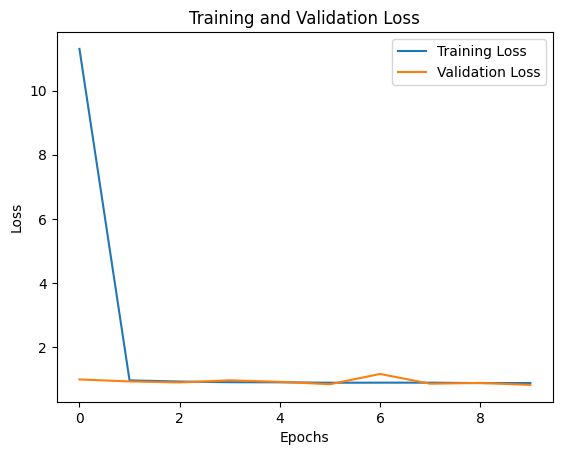

In [41]:

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()




In [42]:
# Predict on test data
y_pred = model.predict(X_test).flatten()  # Flatten to get a 1D array

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error: 0.8164306557351482
R^2 Score: 0.18513443491225479
